<a href="https://colab.research.google.com/github/negia7265/Machine_Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


#from lab_utils_multi import  load_house_data

In [ ]:
df=pd.read_csv("Housing.csv")
y=df['price']

replacement_dict = {'yes': 1, 'no': 0,'furnished':1,'semi-furnished':0.5,'unfurnished':0}

# Specify the columns you want to replace values in
columns_to_replace = ['mainroad', 'guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
# Use the replace method to perform the replacement
df[columns_to_replace] = df[columns_to_replace].replace(replacement_dict)
X = df.drop(columns=['price'])
X.tail()


In [10]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=20)


In [ ]:
X_norm = scaler.fit_transform(X_train)


In [ ]:

sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)

In [84]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
b_norm
w_norm
type(X_train)

pandas.core.frame.DataFrame

In [88]:
XX_test= scaler.fit_transform(X_test)
#XX_train=scaler.fit_transform(X_train)
output=sgdr.predict(XX_test)

In [ ]:

Predict2=np.dot(XX_test,w_norm)+b_norm

In [99]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#y_test=y_test.to_numpy()


In [ ]:
model = LinearRegression()
model.fit(X_norm, y_train)
Predict3 = model.predict(XX_test)
temp=model.score(X_norm, y_train)
temp

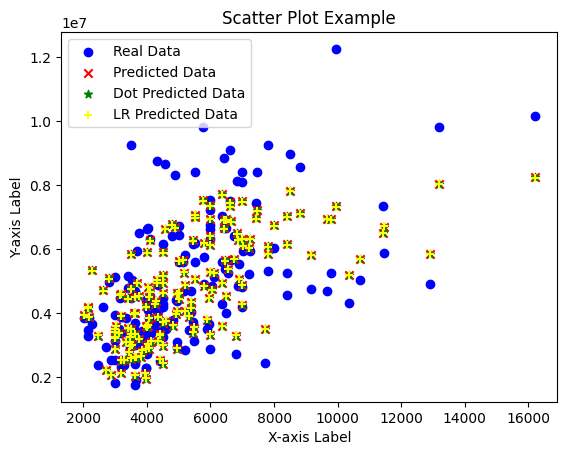

In [106]:
plt.scatter(X_test['area'], y_test, label='Real Data', color='blue', marker='o')

# Create the scatter plot for the second dataset
plt.scatter(X_test['area'], output, label='Predicted Data', color='red', marker='x')
plt.scatter(X_test['area'], Predict2, label='Dot Predicted Data', color='green', marker='*')
plt.scatter(X_test['area'], Predict3, label='LR Predicted Data', color='yellow', marker='+')
#plt.plot(X_test['area'],output,color="green")
#plt.plot(X_test['area'],output, c = "b")

plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Scatter Plot Example")
plt.legend()
plt.show()